# Projeto Grupo BT-G3


<center><img src="https://www.inteli.edu.br/wp-content/uploads/2021/08/20172028/marca_1-2.png" width="50%" height="50%"/></center>

<h1 align='center'><b>IA para Marketing: Monitoramento de campanhas utilizando processamento de linguagem natural (PLN)<b></h1>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c2/Btg-logo-blue.svg" width="50%" height="50%"/></center>

<h2 align='center'>O Banco BTG Pactual enfrenta um desafio na área de Marketing em entender as necessidades e demandas dos clientes de maneira fácil e rápida nas redes sociais. A solução proposta para esse problema foi o desenvolvimento de uma Inteligência Artificial utilizando processamento de linguagem natural (PLN), capaz de monitorar as campanhas de marketing, voltadas para o Instagram. O objetivo principal dessa solução é rastrear os dados em tempo real, analisar e interpretar as mensagens e comentários enviados pelos clientes na rede social, a fim de identificar as necessidades e demandas de forma precisa e eficiente.</h2>

---

# Sobre os dados

Esse projeto está utilizando dados coletados e tratados pela equipe de Automation do BTG Pactual, o qual disponibilizou o dataset. Com base nas informações dispostas nesse dataset, realizaremos insights a cerca dos comentários feitos nos posts do Instagram do próprio banco. Vale lembrar que os dados estão anonimizados e resguardados para manter a privacidade e ética com os usuários e com o banco.

# 1. Instalação / Setup

Para o início do projeto, fizemos o desenvolvimento no Google Colab, por isso temos uma célula de conexão com o Google Drive, para poder acessar os dados. Caso seja rodado no Jupyter Notebook, precisará do dataset baixado.

In [85]:
#Conectar com o Google Drive

# from google.colab import drive
# drive.mount('/content/drive')

#Conectando o ambiente ao Google Drive

Aqui nós fazemos as importações para tratamento, pré-processamento e modelamento do Bag of Words. 

In [86]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from wordcloud import WordCloud

import re
import unicodedata

from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import PlaintextCorpusReader
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk import tokenize
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Rodando o dataset, para analisar seu conteúdo:

In [88]:
data = pd.read_csv('/content/drive/MyDrive/Módulo 6/projeto/base_nova_csv.csv')
data.head(5)

,id,"""dataPublicada""","""autor""","""texto""","""sentimento""","""tipoInteracao""","""anomalia""","""probabilidadeAnomalia""","""linkPost""","""processado""","""contemHyperlink"""
0,1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0


# 2. Tratamento dos Dados

No tratamento de dados, nós analisamos o que podemos mudar no dataframe para fazer uma análise melhor de seus dados e alcançar o objetivo traçado. Dessa forma, é possível visualizar algumas etapas do tratamento abaixo, por exemplo:
- Renomear as colunas para retirar aspas duplos;
- Analisar as colunas com objetos que possam ser quantitativos;
- Remover algumas colunas que não servirão para o desenvolvimento do projeto;
- Filtro para analisar comentários que não tenham o 'btgpactual' como autor, para ter uma análise somente dos usuários.

In [89]:
data = data.rename(columns={'"anomalia"' : 'anomalia', '"dataPublicada"' : 'dataPublicada', '"autor"' : 'autor', '"texto"' : 'texto', '"sentimento"' : 'sentimento', '"tipoInteracao"' : 'tipoInteracao', '"probabilidadeAnomalia"' : 'probabilidadeAnomalia', '"linkPost"' : 'linkPost', '"processado"' : 'processado',  '"contemHyperlink"' : 'contemHyperlink' })

In [90]:
data.head(3)

,id,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
0,1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0


In [91]:
data.describe()

,id,anomalia,probabilidadeAnomalia,processado,contemHyperlink
count,1.235500e+04,12355.000000,12355.000000,12355.0,12355.000000
mean,1.757789e+06,0.222339,37.325698,0.0,0.005423
std,7.967971e+05,0.415835,16.374936,0.0,0.073443
min,1.000000e+00,0.000000,7.000000,0.0,0.000000
25%,1.314377e+06,0.000000,24.000000,0.0,0.000000
50%,1.783879e+06,0.000000,37.000000,0.0,0.000000
75%,2.388714e+06,0.000000,48.000000,0.0,0.000000
max,3.045012e+06,1.000000,100.000000,0.0,1.000000


In [92]:
data_dropado = data.drop(['processado', 'id', 'dataPublicada'], axis=1)
data_dropado.head(3)

,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,contemHyperlink
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0


In [93]:
data_limpo = data_dropado.loc[data_dropado['autor'] != 'btgpactual']
data_limpo

,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,contemHyperlink
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0
...,...,...,...,...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0
12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0
12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0


# 3. Testes isolados



Nesta seção, começamos a fazer testes isolados para demonstrar como é o funcionamento de alguns dos pré-processos que iremos utilizar no dataframe principal. O objetivo é dar um exemplo para visualizar como iremos utilizar antes de ser aplicado em outras funções. Os pré-processos são:
- Tokenização
- Remoção de Stopwords
- Remoção de Alfanuméricos
- Stemming

#### 3.1 Tokenização

In [94]:
# Comentar...

text = "Minuto touro de ouro!"

words = tokenize.word_tokenize(text, language='portuguese')  

words

['Minuto', 'touro', 'de', 'ouro', '!']

#### 3.2 Remoção de stopwords

In [95]:
stopwords = nltk.corpus.stopwords.words('portuguese')

stopwords[:10]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

In [96]:
words_filtered = []

for word in words:
    if word not in stopwords:
        words_filtered.append(word)
        
words_filtered

['Minuto', 'touro', 'ouro', '!']

#### 3.3 Remoção de Alfanuméricos

In [97]:
for palavra in text:
  frasezinha = re.sub((r'[^\w\s]'), ' ', text)

frasezinha

'Minuto touro de ouro '

#### 3.4 Stemming

In [98]:
sn_stemmer = SnowballStemmer('portuguese')
stemmed_words = []
for palavra in words:
  stemmed_words.append(sn_stemmer.stem(palavra))

print(stemmed_words)

['minut', 'tour', 'de', 'our', '!']


# 4. Definição de funções


Aqui em definição de funções é onde iremos criar as funções referentes aos tratamentos que mostramos acima! Já que, dessa forma, poderemos chamar essas mesmas funções em qualquer momento para fazer o tratamento do conteúdo textual.

#### 4.1 Tokenização

In [99]:
def tokenizer(comment):
    if isinstance(comment, str):
        tokens = nltk.word_tokenize(comment)
        return tokens
    else:
        return []

#### 4.2 Remoção de stopwords

In [100]:
def remove_stopwords(tokens):
    if isinstance(tokens, list): 
        comments_filtered = []
        for token in tokens:
          tk = token.lower()
          if tk not in stopwords:
              comments_filtered.append(tk)
        return comments_filtered
    else:
        return []

#### 4.3 Remoção de acentos


In [101]:
def remover_pontuacao(tokens):
    tokens_sem_pontuacao = []
    for token in tokens:
        token_sem_pontuacao = re.sub(r'[^\w\s]', '', token)
        if token_sem_pontuacao != '':
            tokens_sem_pontuacao.append(token_sem_pontuacao)
    return tokens_sem_pontuacao

#### 4.4 Stemming


In [102]:
sn_stemmer = SnowballStemmer('portuguese')

def stemming(comments_no_accent):
    if isinstance(comments_no_accent, list):
        stem_list = []
        for token in comments_no_accent: 
            stem_list.append(sn_stemmer.stem(token))
        return stem_list
    else:
        return []

# 5. Testes das funções

Aqui nos testes das funções, iremos aplicar casos específicos para visualizar como nossa função se comporta, para, logo depois, aplica-la no dataframe principal

In [103]:
#nos testes das funções devemos colocar oq deu certo e oq deu errado (ex: tirar os emotes, não tirar palavras como 'pra', etc)

#### 5.1 Tokenização
- Para o processo de tokenização, é possível visualizar que em qualquer caso, a função consegue tokenizar todo e qualquer termo existente da frase.

In [104]:
teste_tokenizacao = "Estamos fazendo um projeto pro BTG! Ele é muito interessante."
teste_ja_tokenizado = tokenizer(teste_tokenizacao)
print(teste_ja_tokenizado)

['Estamos', 'fazendo', 'um', 'projeto', 'pro', 'BTG', '!', 'Ele', 'é', 'muito', 'interessante', '.']


In [105]:
teste_tokenizacao2 = "Estamos fazendo um projeto pro BTG! ! Ele é muito interessante."
teste_ja_tokenizado2 = tokenizer(teste_tokenizacao2)
print(teste_ja_tokenizado2)

['Estamos', 'fazendo', 'um', 'projeto', 'pro', 'BTG', '!', '!', 'Ele', 'é', 'muito', 'interessante', '.']


In [106]:
teste_tokenizacao3 = "Estamos fazendo um projeto pro BTG!! Ele é muito interessante."
teste_ja_tokenizado3 = tokenizer(teste_tokenizacao3)
print(teste_ja_tokenizado3)

['Estamos', 'fazendo', 'um', 'projeto', 'pro', 'BTG', '!', '!', 'Ele', 'é', 'muito', 'interessante', '.']


In [107]:
teste_tokenizacao4 = "!Estamos fazendo um projeto pro BTG! Ele é muito interessante."
teste_ja_tokenizado4 = tokenizer(teste_tokenizacao4)
print(teste_ja_tokenizado4)

['!', 'Estamos', 'fazendo', 'um', 'projeto', 'pro', 'BTG', '!', 'Ele', 'é', 'muito', 'interessante', '.']


#### 5.2 Remoção de stopwords

In [108]:
teste_sem_stop_words = remove_stopwords(teste_ja_tokenizado)
print(teste_sem_stop_words)

['fazendo', 'projeto', 'pro', 'btg', '!', 'interessante', '.']


In [109]:
teste_sem_stop_words2 = remove_stopwords(teste_ja_tokenizado2)
print(teste_sem_stop_words2)

['fazendo', 'projeto', 'pro', 'btg', '!', '!', 'interessante', '.']


In [110]:
teste_sem_stop_words3 = remove_stopwords(teste_ja_tokenizado3)
print(teste_sem_stop_words3)

['fazendo', 'projeto', 'pro', 'btg', '!', '!', 'interessante', '.']


In [111]:
teste_sem_stop_words4 = remove_stopwords(teste_ja_tokenizado4)
print(teste_sem_stop_words4)

['!', 'fazendo', 'projeto', 'pro', 'btg', '!', 'interessante', '.']


#### 5.3 Remoção de acentos


In [112]:
teste_sem_acento = remover_pontuacao(teste_sem_stop_words)
print(teste_sem_acento)

['fazendo', 'projeto', 'pro', 'btg', 'interessante']


#### 4.4 Stemming


In [113]:
teste_com_stemming = stemming(teste_sem_acento)
print(teste_com_stemming)

['faz', 'projet', 'pro', 'btg', 'interess']


# 6. Processamento / Demonstrações

Nessa seção de processamento, nós aplicamos as funções criadas anteriormente e aplicamos elas no dataframe, como forma de demonstrar os resultados efetivos.
- tokenized = coluna tokenizada
- no_stopwords = coluna tokenizada e sem stopwords
- texto_processed = coluna tokenizada, sem stopwords e sem acentuações
- stemmed = coluna tokenizada, sem stopwords, sem acentuações e com o stemming aplicado

In [114]:
data_limpo['tokenized'] = data_limpo['texto'].apply(tokenizer)
data_limpo 

<ipython-input-114-ae72bb018440>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpo['tokenized'] = data_limpo['texto'].apply(tokenizer)


,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,contemHyperlink,tokenized
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,"[Confira, os, resultados, dos, nossos, fundos,..."
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,"[A, Alvarez, &, Marsal, estará, conosco, no, S..."
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,"[#, Repost, btgpactual, with, make_repost, ・・・..."
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,"[Minuto, touro, de, ouro]"
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,"[@, ricktolledo, Sim]"
...,...,...,...,...,...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0,"[Uma, noite, de, encontros, e, muito, conhecim..."
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,"[Erros, financeiros, para, eliminar, antes, do..."
12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,"[Estou, muito, grato, por, todo, o, esforço, q..."
12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,"[``, 👉GUADAKAN, está, chegando, !, !, !, !, A,..."


In [115]:
data_limpo['no_stopwords'] = data_limpo['tokenized'].apply(remove_stopwords)
data_limpo

<ipython-input-115-2fab3eaca743>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpo['no_stopwords'] = data_limpo['tokenized'].apply(remove_stopwords)


,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,contemHyperlink,tokenized,no_stopwords
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,"[Confira, os, resultados, dos, nossos, fundos,...","[confira, resultados, fundos, mês, fevereiro/2..."
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,"[A, Alvarez, &, Marsal, estará, conosco, no, S...","[alvarez, &, marsal, estará, conosco, sportain..."
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,"[#, Repost, btgpactual, with, make_repost, ・・・...","[#, repost, btgpactual, with, make_repost, ・・・..."
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,"[Minuto, touro, de, ouro]","[minuto, touro, ouro]"
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,"[@, ricktolledo, Sim]","[@, ricktolledo, sim]"
...,...,...,...,...,...,...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0,"[Uma, noite, de, encontros, e, muito, conhecim...","[noite, encontros, conhecimento, onde, cliente..."
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,"[Erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, eliminar, antes, 30, anos..."
12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,"[Estou, muito, grato, por, todo, o, esforço, q...","[grato, todo, esforço, rendeu, investimento, r..."
12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,"[``, 👉GUADAKAN, está, chegando, !, !, !, !, A,...","[``, 👉guadakan, chegando, !, !, !, !, aula, pú..."


In [116]:
data_limpo['texto_processed'] = data_limpo['no_stopwords'].apply(remover_pontuacao)
data_limpo

<ipython-input-116-272a836fa121>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpo['texto_processed'] = data_limpo['no_stopwords'].apply(remover_pontuacao)


,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,contemHyperlink,tokenized,no_stopwords,texto_processed
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,"[Confira, os, resultados, dos, nossos, fundos,...","[confira, resultados, fundos, mês, fevereiro/2...","[confira, resultados, fundos, mês, fevereiro22..."
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,"[A, Alvarez, &, Marsal, estará, conosco, no, S...","[alvarez, &, marsal, estará, conosco, sportain...","[alvarez, marsal, estará, conosco, sportainmet..."
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,"[#, Repost, btgpactual, with, make_repost, ・・・...","[#, repost, btgpactual, with, make_repost, ・・・...","[repost, btgpactual, with, make_repost, entend..."
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,"[Minuto, touro, de, ouro]","[minuto, touro, ouro]","[minuto, touro, ouro]"
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,"[@, ricktolledo, Sim]","[@, ricktolledo, sim]","[ricktolledo, sim]"
...,...,...,...,...,...,...,...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0,"[Uma, noite, de, encontros, e, muito, conhecim...","[noite, encontros, conhecimento, onde, cliente...","[noite, encontros, conhecimento, onde, cliente..."
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,"[Erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, eliminar, antes, 30, anos...","[erros, financeiros, eliminar, antes, 30, anos..."
12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,"[Estou, muito, grato, por, todo, o, esforço, q...","[grato, todo, esforço, rendeu, investimento, r...","[grato, todo, esforço, rendeu, investimento, r..."
12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,"[``, 👉GUADAKAN, está, chegando, !, !, !, !, A,...","[``, 👉guadakan, chegando, !, !, !, !, aula, pú...","[guadakan, chegando, aula, pública, formato, e..."


In [117]:
data_limpo['stemmed'] = data_limpo['texto_processed'].apply(stemming)
data_limpo

<ipython-input-117-166c546c13e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpo['stemmed'] = data_limpo['texto_processed'].apply(stemming)


,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,contemHyperlink,tokenized,no_stopwords,texto_processed,stemmed
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,"[Confira, os, resultados, dos, nossos, fundos,...","[confira, resultados, fundos, mês, fevereiro/2...","[confira, resultados, fundos, mês, fevereiro22...","[conf, result, fund, mês, fevereiro22, tod, in..."
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,"[A, Alvarez, &, Marsal, estará, conosco, no, S...","[alvarez, &, marsal, estará, conosco, sportain...","[alvarez, marsal, estará, conosco, sportainmet...","[alvarez, marsal, estar, conosc, sportainmet, ..."
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,"[#, Repost, btgpactual, with, make_repost, ・・・...","[#, repost, btgpactual, with, make_repost, ・・・...","[repost, btgpactual, with, make_repost, entend...","[repost, btgpactual, with, make_repost, entend..."
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,"[Minuto, touro, de, ouro]","[minuto, touro, ouro]","[minuto, touro, ouro]","[minut, tour, our]"
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,"[@, ricktolledo, Sim]","[@, ricktolledo, sim]","[ricktolledo, sim]","[ricktolled, sim]"
...,...,...,...,...,...,...,...,...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0,"[Uma, noite, de, encontros, e, muito, conhecim...","[noite, encontros, conhecimento, onde, cliente...","[noite, encontros, conhecimento, onde, cliente...","[noit, encontr, conhec, onde, client, barreira..."
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,"[Erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, eliminar, antes, 30, anos...","[erros, financeiros, eliminar, antes, 30, anos...","[erros, financeir, elimin, antes, 30, anos, 1,..."
12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,"[Estou, muito, grato, por, todo, o, esforço, q...","[grato, todo, esforço, rendeu, investimento, r...","[grato, todo, esforço, rendeu, investimento, r...","[grat, tod, esforc, rend, invest, r, 17000, al..."
12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,"[``, 👉GUADAKAN, está, chegando, !, !, !, !, A,...","[``, 👉guadakan, chegando, !, !, !, !, aula, pú...","[guadakan, chegando, aula, pública, formato, e...","[guadakan, cheg, aul, públic, format, espetácu..."


# 7. Pipeline simples de pré-processamento - **IMPORTANTE**

Essa seção é extremamente importante, pois nela criamos a função de pipeline com todas as outras funções que criamos anteriormente. Então, ela é feita para que seja possível de rodar somente ela e ter um resultado efetivo!

In [119]:
data = pd.read_csv('/content/drive/MyDrive/Módulo 6/projeto/base_nova_csv.csv')

In [120]:
data = data.rename(columns={'"anomalia"' : 'anomalia', '"dataPublicada"' : 'dataPublicada', '"autor"' : 'autor', '"texto"' : 'texto', '"sentimento"' : 'sentimento', '"tipoInteracao"' : 'tipoInteracao', '"probabilidadeAnomalia"' : 'probabilidadeAnomalia', '"linkPost"' : 'linkPost', '"processado"' : 'processado',  '"contemHyperlink"' : 'contemHyperlink' })

In [121]:
data_dropado = data.drop(['processado', 'id', 'dataPublicada'], axis=1)

In [122]:
data_limpo = data_dropado.loc[data_dropado['autor'] != 'btgpactual']

In [123]:
data_limpo

,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,contemHyperlink
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0
...,...,...,...,...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0
12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0
12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0


## 7.1 Definição de Função

In [124]:
def tokenizer(comment):
    if isinstance(comment, str):
        tokens = nltk.word_tokenize(comment)
        return tokens
    else:
        return []

In [125]:
def remove_stopwords(tokens):
    if isinstance(tokens, list): 
        comments_filtered = []
        for token in tokens:
          tk = token.lower()
          if tk not in stopwords:
              comments_filtered.append(tk)
        return comments_filtered
    else:
        return []

In [126]:
def remover_pontuacao(tokens):
    tokens_sem_pontuacao = []
    for token in tokens:
        token_sem_pontuacao = re.sub(r'[^\w\s]', '', token)
        if token_sem_pontuacao != '':
            tokens_sem_pontuacao.append(token_sem_pontuacao)
    return tokens_sem_pontuacao

In [127]:
sn_stemmer = SnowballStemmer('portuguese')

def stemming(comments_no_accent):
    if isinstance(comments_no_accent, list):
        stem_list = []
        for token in comments_no_accent: 
            stem_list.append(sn_stemmer.stem(token))
        return stem_list
    else:
        return []

In [128]:
def pipeline(comment):
      # Tokenization
      tokens = tokenizer(comment)
      # Removal of stopwords
      tokens_filtered = remove_stopwords(tokens)
      # Removal of punctuation
      tokens_no_punct = remover_pontuacao(tokens_filtered)
      # Stemming
      stemmed_tokens = stemming(tokens_no_punct)
      return stemmed_tokens

## 7.2 Testes da Função

In [129]:
data_limpo['texto']

0        Confira os resultados dos nossos fundos no mês...
1        A Alvarez & Marsal estará conosco no Sportainm...
2        #Repost btgpactual with make_repost ・・・ Entend...
3                                     Minuto touro de ouro
4                                         @ricktolledo Sim
                               ...                        
12350    Uma noite de encontros e muito conhecimento on...
12351    Erros financeiros para eliminar antes dos 30 a...
12352    Estou muito grato por todo o esforço que você ...
12353    "👉GUADAKAN está chegando!!!!  A aula pública e...
12354    @btgpactual pq o morning call não está mais ap...
Name: texto, Length: 12193, dtype: object

- Criação da nova coluna, somente com a função pipeline, que repassa todo o nosso pré-processamento.

In [130]:
data_limpo['texto_tratado'] = data_limpo['texto'].apply(pipeline)

<ipython-input-130-ab1ab5f02404>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limpo['texto_tratado'] = data_limpo['texto'].apply(pipeline)


In [131]:
data_limpo

,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,contemHyperlink,texto_tratado
0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,"[conf, result, fund, mês, fevereiro22, tod, in..."
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,"[alvarez, marsal, estar, conosc, sportainmet, ..."
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,"[repost, btgpactual, with, make_repost, entend..."
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,"[minut, tour, our]"
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,"[ricktolled, sim]"
...,...,...,...,...,...,...,...,...,...
12350,onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0,"[noit, encontr, conhec, onde, client, barreira..."
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,"[erros, financeir, elimin, antes, 30, anos, 1,..."
12352,jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,"[grat, tod, esforc, rend, invest, r, 17000, al..."
12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,"[guadakan, cheg, aul, públic, format, espetácu..."


---

In [132]:
comment = "Estamos fazendo um projeto pro BTG!"
preprocessed_comment = pipeline(comment)
print(preprocessed_comment)

['faz', 'projet', 'pro', 'btg']


- Caso queira fazer o teste de como está o pré-processamento, digite uma frase!
- Descomente a célula de código abaixo para testar!
  - Selecione todo o conteúdo com seu cursor e clique 'CTRL + ; ' (ctrl + botão de ponto e vírgula)

In [133]:
# comment = input("Digite uma frase da sua escolha e visualize o tratamento: ")
# preprocessed_comment = pipeline(comment)
# print(preprocessed_comment)

# 8. Bag of Words (BoW)

O modelo Bag of Words (BoW) é uma técnica utilizada em processamento de linguagem natural para representar um texto como um conjunto de palavras desordenadas, ignorando a ordem e a estrutura gramatical das frases. 

Nesse modelo, cada palavra única do texto é transformada em uma "feature" (característica), e a frequência de cada palavra no texto é usada como um valor numérico para a feature correspondente.

Por exemplo, a frase "O gato preto pulou o muro" seria representada como um conjunto de palavras desordenadas: `'o', 'gato', 'preto', 'pulou', 'o', 'muro'`. A frequência de cada palavra seria contada, e o resultado seria um vetor numérico que representa a frequência de cada palavra na frase.


In [134]:
# Multiple documents
text = ["Estamos fazendo um projeto pro BTG!", "Somos alunos de Sistemas de Informação do Inteli", "O Renato é o nosso orientador", "O Hayashi é o nosso professor de programação"] 

# create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(sorted(vectorizer.vocabulary_))

# encode document
vector = vectorizer.transform(text)

# summarize encoded vector
print(vector.shape)
print(vector.toarray())

['alunos', 'btg', 'de', 'do', 'estamos', 'fazendo', 'hayashi', 'informação', 'inteli', 'nosso', 'orientador', 'pro', 'professor', 'programação', 'projeto', 'renato', 'sistemas', 'somos', 'um']
(4, 19)
[[0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1]
 [1 0 2 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0]]


**AVISO**:
O modelo Bag of Words é uma técnica simples e eficiente para representar textos em formato vetorial, o que permite utilizá-los em algoritmos de aprendizado de máquina. 

No entanto, essa abordagem ignora informações importantes sobre a estrutura e o significado das frases, como a ordem das palavras e as relações sintáticas entre elas. Por isso, é comum utilizar técnicas mais avançadas, como a modelagem de tópicos (topic modeling) e as redes neurais, para lidar com textos mais complexos.

Porém, para vieses acadêmicos, estamos implementando e aprendendo como é o funcionamento desse processo.

## 8.1 Definição da Função


In [135]:
data_limpo['texto_tratado'] # chamando somente a coluna do dataframe, que ja foi tratada

0        [conf, result, fund, mês, fevereiro22, tod, in...
1        [alvarez, marsal, estar, conosc, sportainmet, ...
2        [repost, btgpactual, with, make_repost, entend...
3                                       [minut, tour, our]
4                                        [ricktolled, sim]
                               ...                        
12350    [noit, encontr, conhec, onde, client, barreira...
12351    [erros, financeir, elimin, antes, 30, anos, 1,...
12352    [grat, tod, esforc, rend, invest, r, 17000, al...
12353    [guadakan, cheg, aul, públic, format, espetácu...
12354    [btgpactual, pq, morning, call, aparec, spotif...
Name: texto_tratado, Length: 12193, dtype: object

In [136]:
textos = data_limpo['texto_tratado']

In [137]:
# Criando a função de vetorização, a qual irá criar um DataFrame com todos os termos e suas contabilizações em cada comentário (representados pelo index)
def bow(comentarios): 
     # Inicializa o CountVectorizer
    vectorizer = CountVectorizer(analyzer=lambda x: x)
    # Cria o modelo Bag of Words
    bow_model = vectorizer.fit_transform(comentarios)
    # Cria um dataframe com as palavras e suas frequências
    bow_df = pd.DataFrame(bow_model.toarray(), columns=vectorizer.get_feature_names_out())
    return bow_df

---

## 8.2 Testes das funções


Como é possível visualizar, temos uma tabela com todos os termos que foram considerados chaves para a análise.

In [138]:
df = bow(textos)
df

,0,000,00000,0000000,0001,001,002,004,005,0050,...,𝚝𝚞𝚍𝚘,𝚞𝚖𝚊,𝚟𝚊𝚒,𝚟𝚊𝚕𝚘𝚛𝚎𝚜,𝚟𝚊𝚛𝚒𝚊𝚜,𝚟𝚘𝚕𝚊𝚝𝚒𝚕𝚒𝚍𝚊𝚍𝚎,𝟭𝟮𝟬,𝟮,𝟮𝟬,𝟯𝟬
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Mostrando a primeira palavra, do primeiro comentário, e como ela se repete uma vez e duas vezes em cada um dos outros comentários

In [139]:
df['conf'].value_counts()

0    11795
1      396
2        2
Name: conf, dtype: int64

In [140]:
df[df['conf'] == 2]

,0,000,00000,0000000,0001,001,002,004,005,0050,...,𝚝𝚞𝚍𝚘,𝚞𝚖𝚊,𝚟𝚊𝚒,𝚟𝚊𝚕𝚘𝚛𝚎𝚜,𝚟𝚊𝚛𝚒𝚊𝚜,𝚟𝚘𝚕𝚊𝚝𝚒𝚕𝚒𝚍𝚊𝚍𝚎,𝟭𝟮𝟬,𝟮,𝟮𝟬,𝟯𝟬
8540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
word_counts = df.sum()
top_words = word_counts.sort_values(ascending=False)
top_10 = top_words.head(10)

In [142]:
top_10

btgpactual    6489
invest        4014
btg           2822
tod           1783
banc          1771
sobr          1364
melhor        1363
cont          1332
merc          1305
financeir     1303
dtype: int64

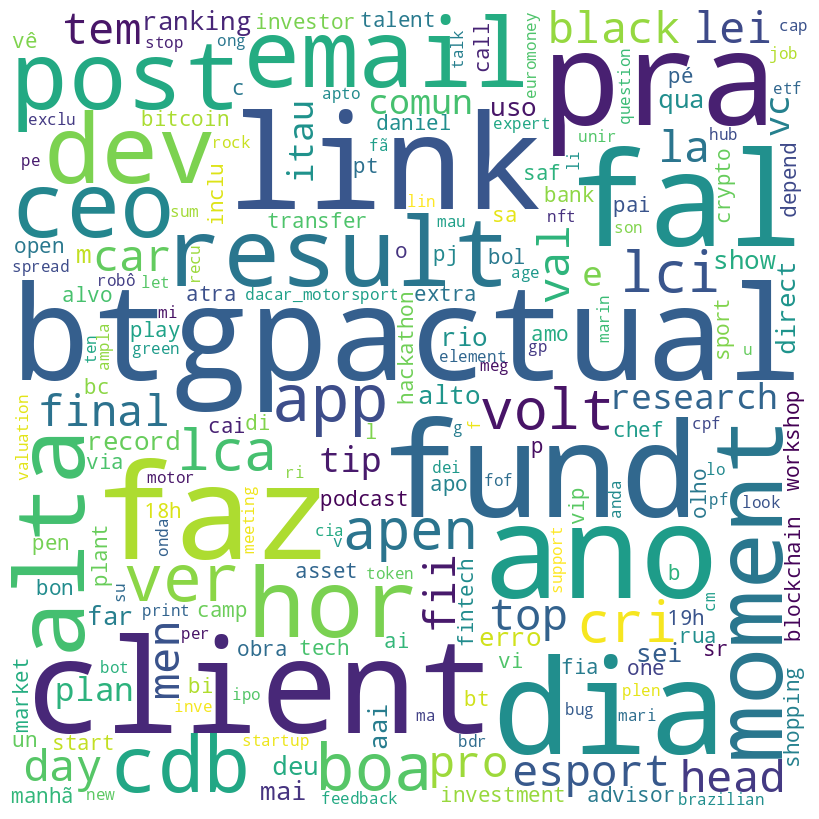

In [143]:
palavras = list(top_words.index)
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(palavras))
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 9. Plotagem de Gráficos

## Autores que mais comentam

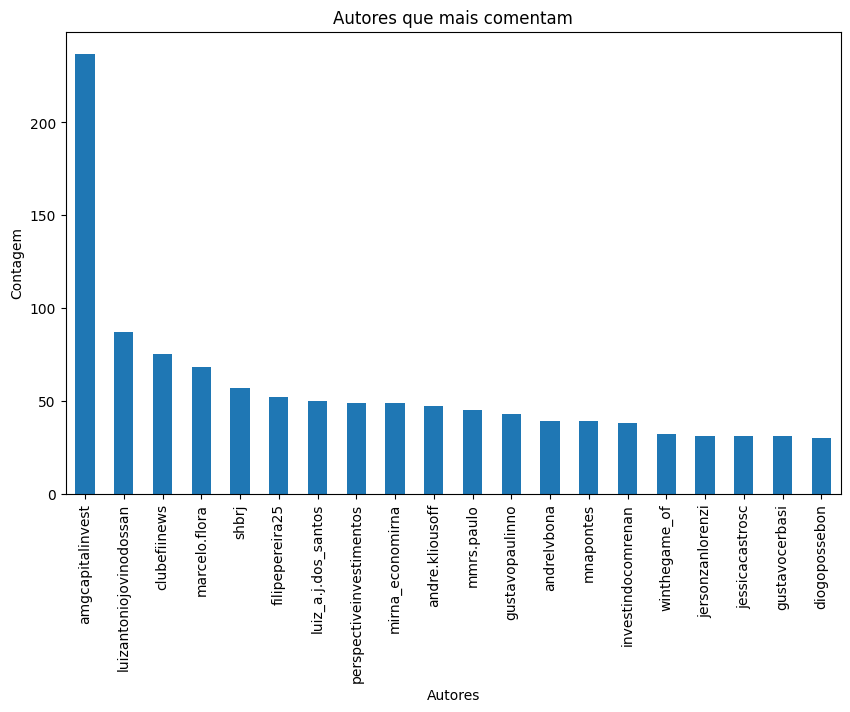

In [144]:
# Contagem de palavras
autor_counts = data_limpo['autor'].explode().value_counts()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
autor_counts.head(20).plot(kind='bar')
plt.xlabel('Autores')
plt.ylabel('Contagem')
plt.title('Autores que mais comentam')
plt.show()

## Palavras mais frequentes

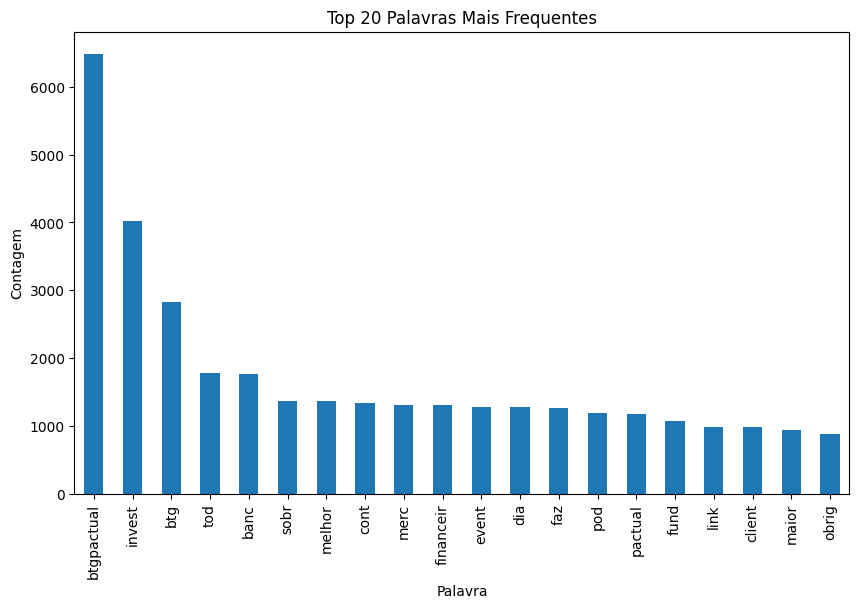

In [145]:
# Contagem de palavras
word_counts = data_limpo['texto_tratado'].explode().value_counts()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
word_counts.head(20).plot(kind='bar')
plt.xlabel('Palavra')
plt.ylabel('Contagem')
plt.title('Top 20 Palavras Mais Frequentes')
plt.show()

## Tipo de interação

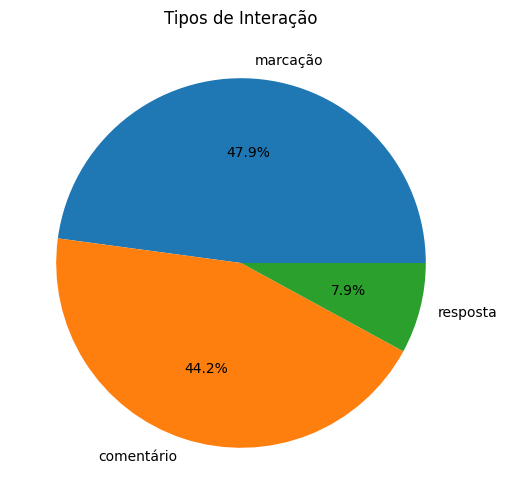

In [146]:
# Contar os tipos de interação
count_interactions = data_limpo['tipoInteracao'].value_counts()
# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
count_interactions.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tipos de Interação')
plt.ylabel('')
plt.show()

## Classificação de sentimentos

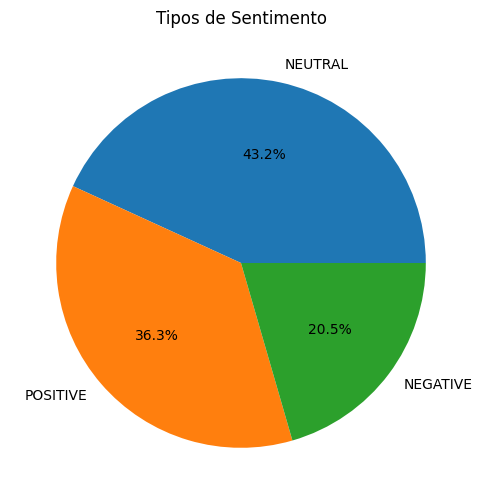

In [147]:
# Contar os tipos de sentimentos
count_sentimentos = data_limpo['sentimento'].value_counts()
# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
count_sentimentos.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tipos de Sentimento')
plt.ylabel('')
plt.show()

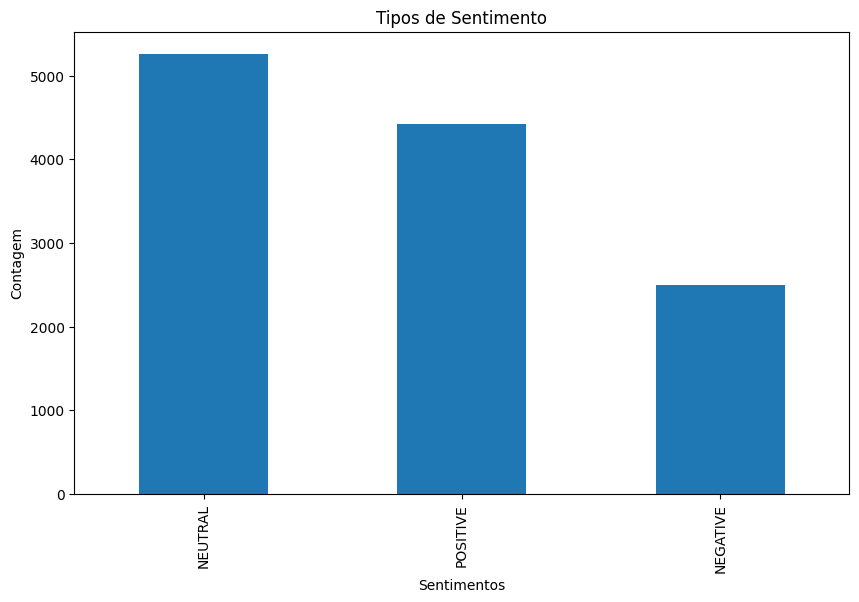

In [148]:
# Contar os tipos de sentimentos
count_sentimentos = data_limpo['sentimento'].value_counts()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
count_sentimentos.plot(kind='bar')
plt.xlabel('Sentimentos')
plt.ylabel('Contagem')
plt.title('Tipos de Sentimento')
plt.show()

# **Desenvolvido por todos os integrantes do grupo**
- Daniel Barzilai
- Larissa Carvalho
- Maria Luisa Maia
- Pedro Rezende
- Rafael Moritz
- Vitor Oliveira
